## Importing all the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [3]:
data = pd.read_csv("covid_data.csv")
data.head()

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage,Needed Hospitalization
0,10.0,Normal,no,no,97.0,No
1,12.0,Normal,no,no,97.0,No
2,15.0,Normal,no,no,94.0,No
3,10.0,Normal,no,no,97.0,No
4,13.0,Moderate,no,no,94.0,No


In [6]:
# rows all columns except the last column
X = data.iloc[:,:-1].values
X

array([[10.0, 'Normal', 'no', 'no', 97.0],
       [12.0, 'Normal', 'no', 'no', 97.0],
       [15.0, 'Normal', 'no', 'no', 94.0],
       [10.0, 'Normal', 'no', 'no', 97.0],
       [13.0, 'Moderate', 'no', 'no', 94.0],
       [12.0, 'Moderate', 'no', 'no', 97.0],
       [13.0, 'Moderate', 'no', 'no', 93.0],
       [15.0, 'Moderate', 'no', 'no', 92.0],
       [18.0, 'Moderate', 'no', 'no', 66.0],
       [19.0, 'Normal', 'no', 'no', 92.0],
       [20.0, 'Normal', 'no', 'no', 93.0],
       [17.0, 'Normal', 'no', 'no', 93.0],
       [16.0, 'Normal', 'no', 'no', 92.0],
       [18.0, 'Normal', 'no', 'no', 93.0],
       [20.0, 'Normal', 'no', 'no', 92.0],
       [25.0, 'Moderate', 'no', 'no', 93.0],
       [24.0, 'Moderate', 'no', 'no', 92.0],
       [26.0, 'High', 'no', 'no', 94.0],
       [28.0, 'Normal', 'no', 'no', 99.0],
       [29.0, 'Normal', 'no', 'no', 93.0],
       [30.0, 'Moderate', 'no', 'no', 62.0],
       [19.0, 'Normal', 'no', 'no', 89.0],
       [25.0, 'Normal', 'no', 'yes', 86.

In [7]:
# only the rows of last column
Y = data.iloc[:,-1].values
Y

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
      dtype=object)

## Handling missing data

In [16]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     - -------------------------------------- 0.3/8.3 MB 8.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.1/8.3 MB 14.3 MB/s eta 0:00:01
     ---------- ----------------------------- 2.1/8.3 MB 16.5 MB/s eta 0:00:01
     ------------- -------------------------- 2.9/8.3 MB 16.7 MB/s eta 0:00:01
     ------------------ --------------------- 3.9/8.3 MB 17.8 MB/s eta 0:00:01
     ---------------------- ----------------- 4.7/8.3 MB 17.6 MB/s eta 0:00:01
     --------------------------- ------------ 5.7/8.3 MB 18.1 MB/s eta 0:00:01
     -------------------------------- ------- 6.6/8.3 MB 18.4 MB/s eta 0:00:01
     ------------------------------------ --- 7.6/8.3 MB 18.6 MB/s eta 0:00:01
     ---------------------------------------  8.3/8.3 MB 18.8 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 17.6 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using

In [19]:
import sklearn
from sklearn.impute import SimpleImputer

In [20]:
#Imputers = Transformer for missing values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

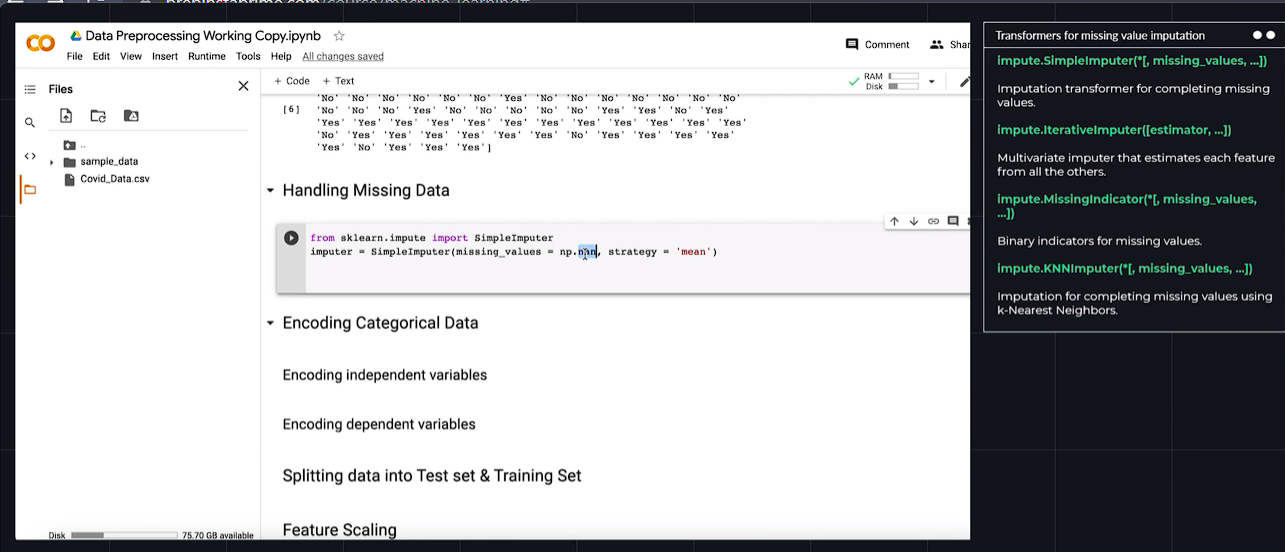

In [21]:
data

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage,Needed Hospitalization
0,10.0,Normal,no,no,97.0,No
1,12.0,Normal,no,no,97.0,No
2,15.0,Normal,no,no,94.0,No
3,10.0,Normal,no,no,97.0,No
4,13.0,Moderate,no,no,94.0,No
...,...,...,...,...,...,...
65,86.0,High,no,yes,76.0,Yes
66,61.0,Moderate,no,yes,90.0,No
67,94.0,High,yes,yes,64.0,Yes
68,81.0,High,yes,yes,75.0,Yes


In [23]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# We can find mean only for 1st and 5th columns since the others are string values

#Filling nan with mean of the 1st column
imputer.fit(X[:,0:1])
X[:,0:1] = imputer.transform(X[:,0:1])
X

array([[10.0, 'Normal', 'no', 'no', 97.0],
       [12.0, 'Normal', 'no', 'no', 97.0],
       [15.0, 'Normal', 'no', 'no', 94.0],
       [10.0, 'Normal', 'no', 'no', 97.0],
       [13.0, 'Moderate', 'no', 'no', 94.0],
       [12.0, 'Moderate', 'no', 'no', 97.0],
       [13.0, 'Moderate', 'no', 'no', 93.0],
       [15.0, 'Moderate', 'no', 'no', 92.0],
       [18.0, 'Moderate', 'no', 'no', 66.0],
       [19.0, 'Normal', 'no', 'no', 92.0],
       [20.0, 'Normal', 'no', 'no', 93.0],
       [17.0, 'Normal', 'no', 'no', 93.0],
       [16.0, 'Normal', 'no', 'no', 92.0],
       [18.0, 'Normal', 'no', 'no', 93.0],
       [20.0, 'Normal', 'no', 'no', 92.0],
       [25.0, 'Moderate', 'no', 'no', 93.0],
       [24.0, 'Moderate', 'no', 'no', 92.0],
       [26.0, 'High', 'no', 'no', 94.0],
       [28.0, 'Normal', 'no', 'no', 99.0],
       [29.0, 'Normal', 'no', 'no', 93.0],
       [30.0, 'Moderate', 'no', 'no', 62.0],
       [19.0, 'Normal', 'no', 'no', 89.0],
       [25.0, 'Normal', 'no', 'yes', 86.

In [24]:
#Filling nan with mean of the 5th column
imputer.fit(X[:,4:5])
X[:,0:1] = imputer.transform(X[:,4:5])
X

array([[97.0, 'Normal', 'no', 'no', 97.0],
       [97.0, 'Normal', 'no', 'no', 97.0],
       [94.0, 'Normal', 'no', 'no', 94.0],
       [97.0, 'Normal', 'no', 'no', 97.0],
       [94.0, 'Moderate', 'no', 'no', 94.0],
       [97.0, 'Moderate', 'no', 'no', 97.0],
       [93.0, 'Moderate', 'no', 'no', 93.0],
       [92.0, 'Moderate', 'no', 'no', 92.0],
       [66.0, 'Moderate', 'no', 'no', 66.0],
       [92.0, 'Normal', 'no', 'no', 92.0],
       [93.0, 'Normal', 'no', 'no', 93.0],
       [93.0, 'Normal', 'no', 'no', 93.0],
       [92.0, 'Normal', 'no', 'no', 92.0],
       [93.0, 'Normal', 'no', 'no', 93.0],
       [92.0, 'Normal', 'no', 'no', 92.0],
       [93.0, 'Moderate', 'no', 'no', 93.0],
       [92.0, 'Moderate', 'no', 'no', 92.0],
       [94.0, 'High', 'no', 'no', 94.0],
       [99.0, 'Normal', 'no', 'no', 99.0],
       [93.0, 'Normal', 'no', 'no', 93.0],
       [62.0, 'Moderate', 'no', 'no', 62.0],
       [89.0, 'Normal', 'no', 'no', 89.0],
       [86.0, 'Normal', 'no', 'yes', 86.

# Encoding categorical data

## 1. Encoding independent variables

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [26]:
# We are transforming the data of 1 column(body_temperature) into 3, 
# since there are 3 categorical variables in the same column
# Low, Moderate, High
# High = 1 0 0
# Moderate = 0 1 0
# Low = 0 0 1

# ct = column transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')

In [27]:
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 97.0, 'no', 'no', 97.0],
       [0.0, 0.0, 1.0, 97.0, 'no', 'no', 97.0],
       [0.0, 0.0, 1.0, 94.0, 'no', 'no', 94.0],
       [0.0, 0.0, 1.0, 97.0, 'no', 'no', 97.0],
       [0.0, 1.0, 0.0, 94.0, 'no', 'no', 94.0],
       [0.0, 1.0, 0.0, 97.0, 'no', 'no', 97.0],
       [0.0, 1.0, 0.0, 93.0, 'no', 'no', 93.0],
       [0.0, 1.0, 0.0, 92.0, 'no', 'no', 92.0],
       [0.0, 1.0, 0.0, 66.0, 'no', 'no', 66.0],
       [0.0, 0.0, 1.0, 92.0, 'no', 'no', 92.0],
       [0.0, 0.0, 1.0, 93.0, 'no', 'no', 93.0],
       [0.0, 0.0, 1.0, 93.0, 'no', 'no', 93.0],
       [0.0, 0.0, 1.0, 92.0, 'no', 'no', 92.0],
       [0.0, 0.0, 1.0, 93.0, 'no', 'no', 93.0],
       [0.0, 0.0, 1.0, 92.0, 'no', 'no', 92.0],
       [0.0, 1.0, 0.0, 93.0, 'no', 'no', 93.0],
       [0.0, 1.0, 0.0, 92.0, 'no', 'no', 92.0],
       [1.0, 0.0, 0.0, 94.0, 'no', 'no', 94.0],
       [0.0, 0.0, 1.0, 99.0, 'no', 'no', 99.0],
       [0.0, 0.0, 1.0, 93.0, 'no', 'no', 93.0],
       [0.0, 1.0, 0.0, 62.0, 'no', 'no',

## 2. Encoding dependent variables

In [30]:
from sklearn.preprocessing import LabelEncoder

# Y is the last column which has yes or no values. 
# So, we are trying to represent yes and no with 0 and 1

le = LabelEncoder()
y = le.fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

# Splitting data into training and testing

In [32]:
from sklearn.model_selection import train_test_split

# Everytime we run the model with the same number we give in random, the result will be same
# If we don't give anything in random, everytime we run the model, we get different result
# General convention is random state = 42

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [33]:
X_train

array([[1.0, 0.0, 0.0, 69.0, 'no', 'yes', 69.0],
       [1.0, 0.0, 0.0, 75.0, 'yes', 'yes', 75.0],
       [1.0, 0.0, 0.0, 71.0, 'yes', 'yes', 71.0],
       [1.0, 0.0, 0.0, 76.0, 'yes', 'yes', 76.0],
       [1.0, 0.0, 0.0, 69.0, 'yes', 'yes', 69.0],
       [1.0, 0.0, 0.0, 68.0, 'yes', 'yes', 68.0],
       [1.0, 0.0, 0.0, 73.0, 'yes', 'yes', 73.0],
       [0.0, 1.0, 0.0, 93.0, 'no', 'yes', 93.0],
       [0.0, 0.0, 1.0, 89.0, 'no', 'no', 89.0],
       [1.0, 0.0, 0.0, 76.0, 'yes', 'no', 76.0],
       [0.0, 0.0, 1.0, 97.0, 'no', 'no', 97.0],
       [1.0, 0.0, 0.0, 77.0, 'yes', 'yes', 77.0],
       [1.0, 0.0, 0.0, 91.0, 'yes', 'no', 91.0],
       [1.0, 0.0, 0.0, 72.0, 'no', 'yes', 72.0],
       [0.0, 0.0, 1.0, 93.0, 'no', 'no', 93.0],
       [0.0, 1.0, 0.0, 93.0, 'no', 'no', 93.0],
       [0.0, 0.0, 1.0, 93.0, 'no', 'no', 93.0],
       [1.0, 0.0, 0.0, 80.0, 'yes', 'yes', 80.0],
       [0.0, 0.0, 1.0, 89.0, 'no', 'no', 89.0],
       [0.0, 1.0, 0.0, 66.0, 'no', 'no', 66.0],
       [1.0, 0.0, 0

In [34]:
X_test

array([[1.0, 0.0, 0.0, 76.0, 'no', 'yes', 76.0],
       [0.0, 1.0, 0.0, 89.0, 'no', 'no', 89.0],
       [0.0, 1.0, 0.0, 90.0, 'no', 'yes', 90.0],
       [1.0, 0.0, 0.0, 68.0, 'yes', 'no', 68.0],
       [0.0, 1.0, 0.0, 84.0, 'no', 'yes', 84.0],
       [1.0, 0.0, 0.0, 92.0, 'no', 'yes', 92.0],
       [1.0, 0.0, 0.0, 67.0, 'yes', 'no', 67.0],
       [1.0, 0.0, 0.0, 92.0, 'no', 'no', 92.0],
       [1.0, 0.0, 0.0, 66.0, 'yes', 'yes', 66.0],
       [1.0, 0.0, 0.0, 75.0, 'no', 'no', 75.0],
       [0.0, 0.0, 1.0, 94.0, 'no', 'no', 94.0],
       [1.0, 0.0, 0.0, 90.0, 'yes', 'no', 90.0],
       [0.0, 0.0, 1.0, 88.0, 'no', 'yes', 88.0],
       [1.0, 0.0, 0.0, 92.0, 'no', 'no', 92.0]], dtype=object)

In [35]:
y_train

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes'], dtype=object)

In [36]:
y_test

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No'], dtype=object)

## Feature scaling

Q. What is feature scaling?

    It is a technique to stamdardize the independent features present in the data in a fixed range. It is performed during the data pre processing to handle highly varying magnitudes or values or units. (Compressing the range of values)

In [38]:
# Feature scaling for blood oxygen percentage column (6th column after column transformation)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:,6:] = sc.fit_transform(X_train[:,6:]) 
X_test[:,6:] = sc.fit_transform(X_test[:,6:])

X_train

array([[1.0, 0.0, 0.0, 69.0, 'no', 'yes', -1.0703339870526563],
       [1.0, 0.0, 0.0, 75.0, 'yes', 'yes', -0.5693265888577957],
       [1.0, 0.0, 0.0, 71.0, 'yes', 'yes', -0.9033315209877028],
       [1.0, 0.0, 0.0, 76.0, 'yes', 'yes', -0.48582535582531894],
       [1.0, 0.0, 0.0, 69.0, 'yes', 'yes', -1.0703339870526563],
       [1.0, 0.0, 0.0, 68.0, 'yes', 'yes', -1.1538352200851332],
       [1.0, 0.0, 0.0, 73.0, 'yes', 'yes', -0.7363290549227492],
       [0.0, 1.0, 0.0, 93.0, 'no', 'yes', 0.9336956057267861],
       [0.0, 0.0, 1.0, 89.0, 'no', 'no', 0.599690673596879],
       [1.0, 0.0, 0.0, 76.0, 'yes', 'no', -0.48582535582531894],
       [0.0, 0.0, 1.0, 97.0, 'no', 'no', 1.2677005378566932],
       [1.0, 0.0, 0.0, 77.0, 'yes', 'yes', -0.4023241227928422],
       [1.0, 0.0, 0.0, 91.0, 'yes', 'no', 0.7666931396618326],
       [1.0, 0.0, 0.0, 72.0, 'no', 'yes', -0.8198302879552261],
       [0.0, 0.0, 1.0, 93.0, 'no', 'no', 0.9336956057267861],
       [0.0, 1.0, 0.0, 93.0, 'no', 'no',

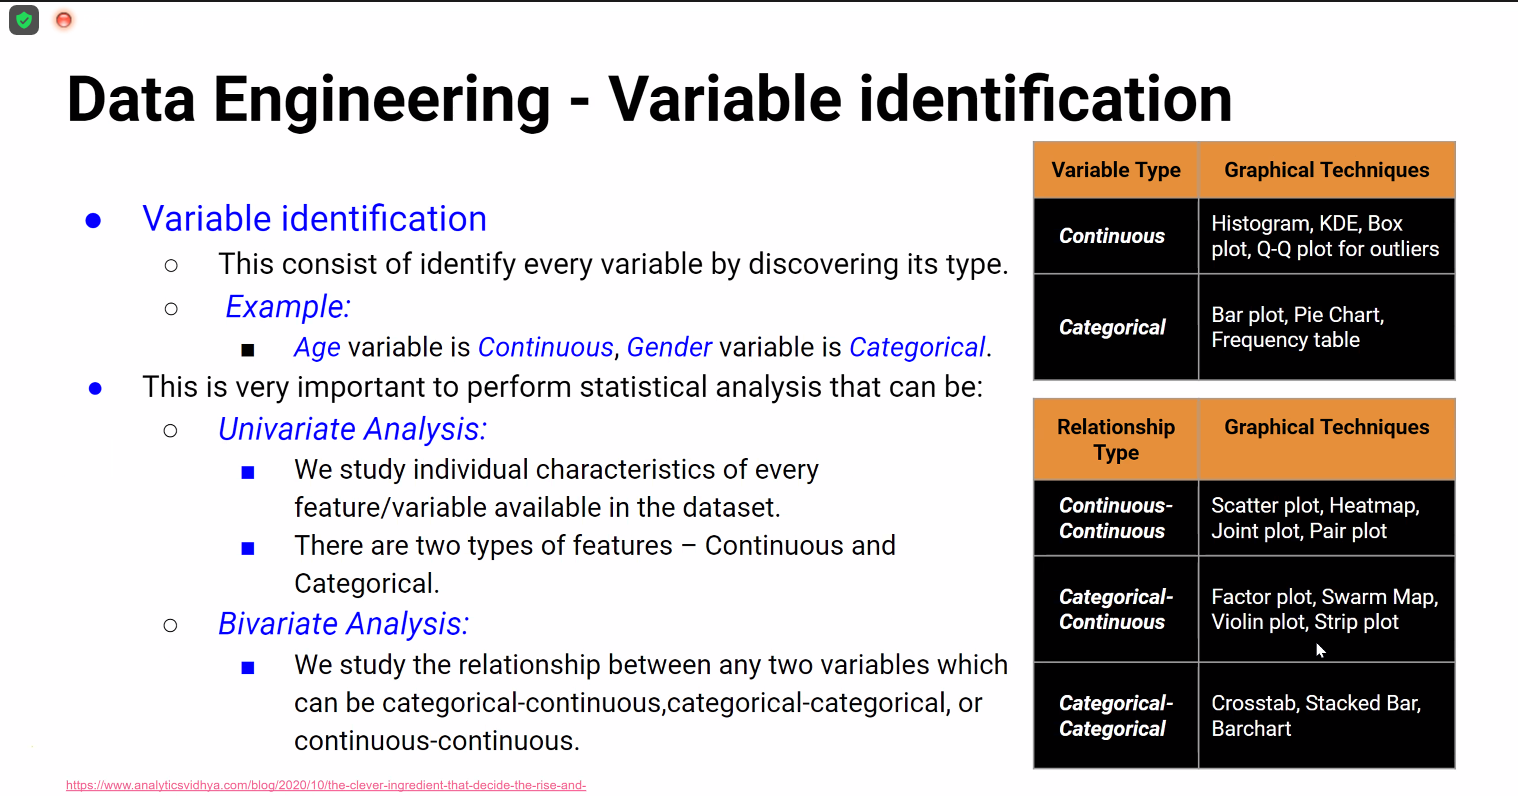